In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math

# Data Understanding

## Reading the dataset 

In [2]:
# Reading the "housing" dataset, housing as HS

HS = pd.read_csv("housing.csv")

In [3]:
# Basic Information of dataset

HS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
# Describing the housing dataset

HS.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [5]:
# To view the columns of dataset

HS.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
# To view the index of dataset

HS.index

RangeIndex(start=0, stop=4600, step=1)

In [7]:
# Shape of dataset

HS.shape

(4600, 18)

In [8]:
# Size of dataset

HS.size

82800

In [9]:
# First 5 records of the dataset

HS.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
# Last 5 records of dataset

HS.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,09/07/2014 0:00,308166.6667,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0,NaN,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/2014 0:00,534333.3333,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0,NaN,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/2014 0:00,416904.1667,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0,NaN,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/2014 0:00,203400.0000,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020,NaN,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10/07/2014 0:00,220600.0000,3,2.50,1490.0,8102.0,2.0,0,0,4,1490,0,NaN,0,18717 SE 258th St,Covington,WA 98042,USA


In [11]:
# to see the unique values in columns

HS.apply(lambda x:x.unique()) 

date             [02/05/2014 0:00, 03/05/2014 0:00, 04/05/2014 ...
price            [313000.0, 2384000.0, 342000.0, 420000.0, 5500...
bedrooms                            [3, 5, 4, 2, 6, 7, 9, 1, 8, 0]
bathrooms        [1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3....
sqft_living      [1340.0, 3650.0, 1930.0, 2000.0, 1940.0, 880.0...
sqft_lot         [nan, 9480.0, 9720.0, 6700.0, 7231.0, 15878.0,...
floors                              [1.5, 2.0, 1.0, 2.5, 3.0, 3.5]
waterfront                                                  [0, 1]
view                                               [0, 4, 1, 2, 3]
condition                                          [3, 5, 4, 2, 1]
sqft_above       [1340, 3370, 1930, 1000, 1140, 880, 1350, 2710...
sqft_basement    [0, 280, 1000, 800, 860, 1010, 360, 690, 470, ...
yr_built         [1955.0, 1921.0, 1966.0, 1963.0, 1976.0, 1938....
yr_renovated     [2005, 0, 1992, 1994, 2010, 1988, 2009, 1969, ...
street           [18810 Densmore Ave N, 709 W Blaine St, 26206

# Basic Cleaning of dataset

## To find missing values in data set

In [12]:
# Number of missing values in each column in each rows

HS.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [13]:
# No of missing values in each row in every column

HS.isnull().sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
4595    1
4596    1
4597    1
4598    1
4599    1
Length: 4600, dtype: int64

In [14]:
# Total number of missing values in dataset

HS.isnull().sum().sum()

134

In [15]:
# Percentage of missing values in each column

round(100*(HS.isnull().sum()/len(HS.index)),2).sort_values(ascending=False).head(15)

city             1.24
sqft_living      0.87
yr_built         0.50
sqft_lot         0.30
date             0.00
sqft_above       0.00
statezip         0.00
street           0.00
yr_renovated     0.00
sqft_basement    0.00
condition        0.00
price            0.00
view             0.00
waterfront       0.00
floors           0.00
dtype: float64

# Cleaning of dataset

In [16]:
# Steps done in cleaning of dataset

# Fixing rows and columns
# Fixing missing values
# Standardizing values
# Fixing invalid values
# Filtering data

## Handling missing values and imputing

In [17]:
# Describing the "sqft_living" column to know the mean

HS["sqft_living"].describe()

count     4560.000000
mean      2138.935526
std        965.011449
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [18]:
# Imputing missing values of "sqft_living" column using mean

HS["sqft_living"]=HS["sqft_living"].fillna(2138.93)

In [19]:
# Describing the "sqft_lot" column to know the mean

HS["sqft_lot"].describe()

count    4.586000e+03
mean     1.485981e+04
std      3.592050e+04
min      6.380000e+02
25%      5.000000e+03
50%      7.683500e+03
75%      1.101850e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64

In [20]:
# Imputing missing values of "sqft_lot" column using mean

HS["sqft_lot"]=HS["sqft_lot"].fillna(14856.81)

In [21]:
# Describing the "yr_built" column to know the mean

HS["yr_built"].describe()

count    4577.000000
mean     1970.808827
std        29.724793
min      1900.000000
25%      1951.000000
50%      1976.000000
75%      1997.000000
max      2014.000000
Name: yr_built, dtype: float64

In [22]:
# Imputing missing values of "sqft_lot" column using mean

HS["yr_built"]=HS["yr_built"].fillna(1970)

In [23]:
# Describing the "city" column to know the mode

HS["city"].describe()

count        4543
unique         44
top       Seattle
freq         1555
Name: city, dtype: object

In [24]:
# Imputing missing values of "city" column using mode

HS["city"]=HS["city"].fillna("Seattle")

In [25]:
# Describing the "price" column to know the mode

HS["price"].describe()

count    4.600000e+03
mean     5.539483e+05
std      5.808371e+05
min      0.000000e+00
25%      3.225000e+05
50%      4.610000e+05
75%      6.550000e+05
max      2.659000e+07
Name: price, dtype: float64

In [26]:
# Imputing missing values of "price" column using mean

HS["price"]=HS["price"].fillna(5.539483e+05)

In [27]:
# After imputing missing values - Number of missing values in each column

HS.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Handling Address inconsistencies

In [28]:
# Checking for Address inconsistencies using regualr expression

import re

A=HS["street"]


# Function to check if the address contains a street number
def is_valid_address(address):
    for i in A:
        return bool(re.match(r'\d+', address))

# Proper_addresses
Proper_addresses = [address for address in A if is_valid_address(address)]

# Inconsistent_address

Inconsistent_address = []
for i in A:
    if i not in Proper_addresses:
        Inconsistent_address.append(i)

In [29]:
# Dropping inconsistent address

indices_to_drop = HS[HS['street'].isin(Inconsistent_address)].index
HS_AD = HS.drop(indices_to_drop)

In [30]:
# Regularizing the address

HS_AD["street"]=HS_AD["street"].apply(lambda x : re.sub(r'\bAve\b', 'Avenue', x))
HS_AD["street"]=HS_AD["street"].apply(lambda x : re.sub(r'\bSt\b', 'Street', x))  

## Fixing invalid values

In [31]:
# Using ceil function to make number of bathrooms as valid integer 

HS_AD["bathrooms"] = HS_AD["bathrooms"].apply(lambda x : math.ceil(x))

In [32]:
# Using ceil function to make number of floors as valid integer

HS_AD["floors"] = HS_AD["floors"].apply(lambda x : math.ceil(x))

In [33]:
# The column "date" Indicates The date when the property information was recorded.
# Time is not required, so we delete the time

HS_AD["date"]=HS_AD["date"].apply(lambda x : x.split(' ')[0])

## Standardizing values

In [34]:
# The column "Waterfront" Indicates whether the property has a waterfront view

# 0 - Not Available
# 1 - Available

In [35]:
# Mapping the assosiated labels for the values of "weathersit" column

HS_AD["waterfront"] = HS_AD["waterfront"].map({0:"Not Available",1:"Available"})

In [36]:
# The column "View" - An index from 0 to 4 representing the quality of the view from the property

# 0 - Fair View
# 1 - Average View
# 2 - Good View
# 3 - Excellent View
# 4 - Extraordinary View

In [37]:
# Mapping the assosiated labels for the values of "view" column

HS_AD["view"] = HS_AD["view"].map({0:"Fair View",1:"Average View",2:"Good View",3:"Excellent View",4:"Extraordinary View"})

In [38]:
# The column "Condition": An index from 1 to 5 representing the overall condition of the property

# 1 - Fair Condition : Functional but may need some repairs or updates.
# 2 - Average Condition : Generally well-maintained but may show signs of wear.
# 3 - Very Good Condition : Well-maintained and recently updated or renovated.
# 4 - Excellent Condition : Like new, often recently constructed or fully renovated.
# 5 - Pristine Condition : Perfect condition, exceptionally well-maintained.

In [39]:
# Mapping the assosiated labels for the values of "view" column

HS_AD["condition"] = HS_AD["condition"].map({1:"Fair Condition",2:"Average Condition",3:"Very Good Condition",
                                             4:"Excellent Condition",5:"Pristine Condition"})

## Checking for outliers

In [40]:
# Numeric columns are stored in the variable "numeric_columns"

numeric_columns = HS_AD.select_dtypes(include=["float","int"])

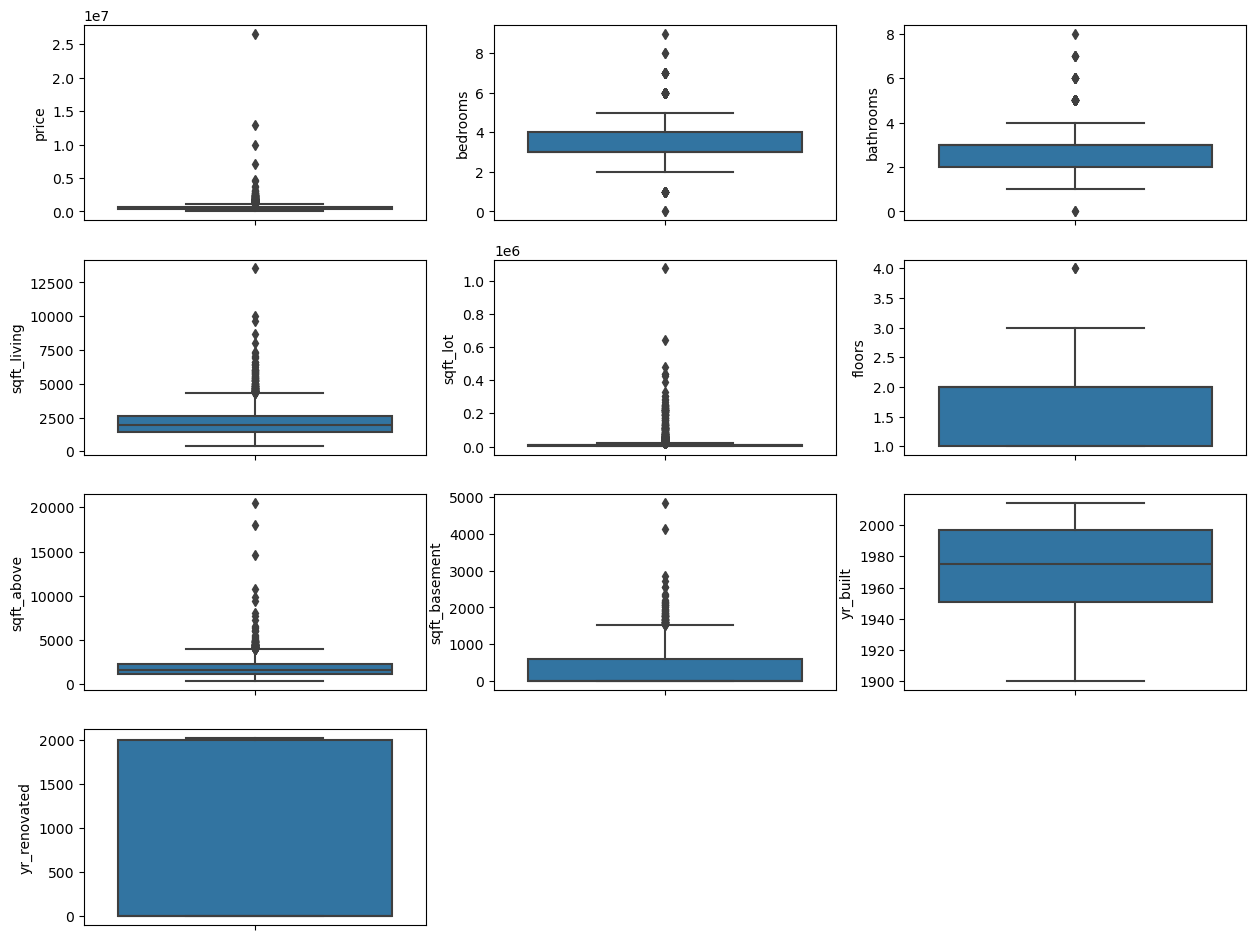

In [41]:
# Boxplots are plotted for numeric columns to check outliers

plt.figure(figsize=(15,30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(10,3,i+1)
    sns.boxplot(y = numeric_columns.columns[i], data=HS_AD)
plt.show()

In [42]:
# Describing "bedrooms" column to handle outliers manually

HS_AD["bedrooms"].describe()

count    4580.000000
mean        3.401528
std         0.909606
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedrooms, dtype: float64

In [43]:
# Knowing where the value distorts abruptly

print("At 0%, bedrooms is",HS_AD["bedrooms"].quantile(0.00))
print("At 1%, bedrooms is",HS_AD["bedrooms"].quantile(0.01))
print("At 2%, bedrooms is",HS_AD["bedrooms"].quantile(0.02))
print("At 5%, bedrooms is",HS_AD["bedrooms"].quantile(0.05))
print("At 10%, bedrooms is",HS_AD["bedrooms"].quantile(0.10))
print("At 15%, bedrooms is",HS_AD["bedrooms"].quantile(0.15))
print("At 20%, bedrooms is",HS_AD["bedrooms"].quantile(0.20))
print("At 80%, bedrooms is",HS_AD["bedrooms"].quantile(0.80))
print("At 85%, bedrooms is",HS_AD["bedrooms"].quantile(0.85))
print("At 90%, bedrooms is",HS_AD["bedrooms"].quantile(0.90))
print("At 95%, bedrooms is",HS_AD["bedrooms"].quantile(0.95))
print("At 97%, bedrooms is",HS_AD["bedrooms"].quantile(0.97))
print("At 99%, bedrooms is",HS_AD["bedrooms"].quantile(0.99))
print("At 100%, bedrooms is",HS_AD["bedrooms"].quantile(1.00))

At 0%, bedrooms is 0.0
At 1%, bedrooms is 2.0
At 2%, bedrooms is 2.0
At 5%, bedrooms is 2.0
At 10%, bedrooms is 2.0
At 15%, bedrooms is 3.0
At 20%, bedrooms is 3.0
At 80%, bedrooms is 4.0
At 85%, bedrooms is 4.0
At 90%, bedrooms is 4.0
At 95%, bedrooms is 5.0
At 97%, bedrooms is 5.0
At 99%, bedrooms is 6.0
At 100%, bedrooms is 9.0


In [44]:
# The value distorts more at 0% and 100% so lets drop the records where "bedrooms" > 6 and "bedrooms" < 1

HS_AD = HS_AD[~(HS_AD["bedrooms"]>6)]
HS_AD = HS_AD[~(HS_AD["bedrooms"]<1)]

In [45]:
# Describing "bathrooms" column to handle outliers manually

HS_AD["bathrooms"].describe()

count    4561.000000
mean        2.482570
std         0.922533
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: bathrooms, dtype: float64

In [46]:
# Knowing where the value distorts abruptly

print("At 0%, bathrooms is",HS_AD["bathrooms"].quantile(0.00))
print("At 1%, bathrooms is",HS_AD["bathrooms"].quantile(0.01))
print("At 2%, bathrooms is",HS_AD["bathrooms"].quantile(0.02))
print("At 5%, bathrooms is",HS_AD["bathrooms"].quantile(0.05))
print("At 10%, bathrooms is",HS_AD["bathrooms"].quantile(0.10))
print("At 15%, bathrooms is",HS_AD["bathrooms"].quantile(0.15))
print("At 20%, bathrooms is",HS_AD["bathrooms"].quantile(0.20))
print("At 80%, bathrooms is",HS_AD["bathrooms"].quantile(0.80))
print("At 85%, bathrooms is",HS_AD["bathrooms"].quantile(0.85))
print("At 90%, bathrooms is",HS_AD["bathrooms"].quantile(0.90))
print("At 95%, bathrooms is",HS_AD["bathrooms"].quantile(0.95))
print("At 97%, bathrooms is",HS_AD["bathrooms"].quantile(0.97))
print("At 99%, bathrooms is",HS_AD["bathrooms"].quantile(0.99))
print("At 100%, bathrooms is",HS_AD["bathrooms"].quantile(1.00))

At 0%, bathrooms is 1.0
At 1%, bathrooms is 1.0
At 2%, bathrooms is 1.0
At 5%, bathrooms is 1.0
At 10%, bathrooms is 1.0
At 15%, bathrooms is 1.0
At 20%, bathrooms is 2.0
At 80%, bathrooms is 3.0
At 85%, bathrooms is 3.0
At 90%, bathrooms is 3.0
At 95%, bathrooms is 4.0
At 97%, bathrooms is 4.0
At 99%, bathrooms is 5.0
At 100%, bathrooms is 7.0


In [47]:
# The value distorts more at 0% and 100% so lets drop the records where "bathrooms" > 6 and bathrooms" < 1

HS_AD = HS_AD[~(HS_AD["bathrooms"]>6)]
HS_AD = HS_AD[~(HS_AD["bathrooms"]<1)]

In [48]:
# Describing "sqft_living" column to handle outliers manually

HS_AD["sqft_living"].describe()

count     4557.000000
mean      2121.978319
std        920.488418
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2600.000000
max      10040.000000
Name: sqft_living, dtype: float64

In [49]:
# Knowing where the value distorts abruptly

print("At 0%, sqft_living is",HS_AD["sqft_living"].quantile(0.00))
print("At 1%, sqft_living is",HS_AD["sqft_living"].quantile(0.01))
print("At 2%, sqft_living is",HS_AD["sqft_living"].quantile(0.02))
print("At 5%, sqft_living is",HS_AD["sqft_living"].quantile(0.05))
print("At 10%, sqft_living is",HS_AD["sqft_living"].quantile(0.10))
print("At 15%, sqft_living is",HS_AD["sqft_living"].quantile(0.15))
print("At 20%, sqft_living is",HS_AD["sqft_living"].quantile(0.20))
print("At 80%, sqft_living is",HS_AD["sqft_living"].quantile(0.80))
print("At 85%, sqft_living is",HS_AD["sqft_living"].quantile(0.85))
print("At 90%, sqft_living is",HS_AD["sqft_living"].quantile(0.90))
print("At 95%, sqft_living is",HS_AD["sqft_living"].quantile(0.95))
print("At 97%, sqft_living is",HS_AD["sqft_living"].quantile(0.97))
print("At 99%, sqft_living is",HS_AD["sqft_living"].quantile(0.99))
print("At 100%, sqft_living is",HS_AD["sqft_living"].quantile(1.00))

At 0%, sqft_living is 370.0
At 1%, sqft_living is 720.0
At 2%, sqft_living is 800.0
At 5%, sqft_living is 950.0
At 10%, sqft_living is 1110.0
At 15%, sqft_living is 1230.0
At 20%, sqft_living is 1350.0
At 80%, sqft_living is 2770.0
At 85%, sqft_living is 3010.0
At 90%, sqft_living is 3300.0
At 95%, sqft_living is 3840.0
At 97%, sqft_living is 4250.0
At 99%, sqft_living is 4977.599999999984
At 100%, sqft_living is 10040.0


In [50]:
# The value distorts more at 100% so lets drop the records where "sqft_living" > 7000

HS_AD = HS_AD[~(HS_AD["sqft_living"]>6000)]

In [51]:
# Describing "sqft_lot" column to handle outliers manually

HS_AD["sqft_lot"].describe()

count    4.544000e+03
mean     1.454482e+04
std      3.511143e+04
min      6.380000e+02
25%      5.000000e+03
50%      7.680000e+03
75%      1.100000e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64

In [52]:
# Knowing where the value distorts abruptly

print("At 0%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.00))
print("At 1%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.01))
print("At 2%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.02))
print("At 5%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.05))
print("At 10%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.10))
print("At 15%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.15))
print("At 20%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.20))
print("At 80%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.80))
print("At 85%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.85))
print("At 90%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.90))
print("At 95%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.95))
print("At 97%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.97))
print("At 99%, sqft_lot is",HS_AD["sqft_lot"].quantile(0.99))
print("At 100%, sqft_lot is",HS_AD["sqft_lot"].quantile(1.00))

At 0%, sqft_lot is 638.0
At 1%, sqft_lot is 1024.15
At 2%, sqft_lot is 1199.58
At 5%, sqft_lot is 1676.15
At 10%, sqft_lot is 3250.0
At 15%, sqft_lot is 4000.0
At 20%, sqft_lot is 4600.0
At 80%, sqft_lot is 12717.200000000003
At 85%, sqft_lot is 15600.0
At 90%, sqft_lot is 23400.0
At 95%, sqft_lot is 43099.49999999999
At 97%, sqft_lot is 60502.76000000001
At 99%, sqft_lot is 191724.46999999974
At 100%, sqft_lot is 1074218.0


In [53]:
# The value distorts more at 99% so lets drop the records where "sqft_lot" > 191611

HS_AD = HS_AD[~(HS_AD["sqft_lot"]>191611)]

In [54]:
# Describing "sqft_above" column to handle outliers manually

HS_AD["sqft_above"].describe()

count     4498.000000
mean      1809.100489
std        918.398850
min        350.000000
25%       1180.000000
50%       1580.000000
75%       2280.000000
max      20450.000000
Name: sqft_above, dtype: float64

In [55]:
# Knowing where the value distorts abruptly

print("At 0%, sqft_above is",HS_AD["sqft_above"].quantile(0.00))
print("At 1%, sqft_above is",HS_AD["sqft_above"].quantile(0.01))
print("At 2%, sqft_above is",HS_AD["sqft_above"].quantile(0.02))
print("At 5%, sqft_above is",HS_AD["sqft_above"].quantile(0.05))
print("At 10%, sqft_above is",HS_AD["sqft_above"].quantile(0.10))
print("At 15%, sqft_above is",HS_AD["sqft_above"].quantile(0.15))
print("At 20%, sqft_above is",HS_AD["sqft_above"].quantile(0.20))
print("At 80%, sqft_above is",HS_AD["sqft_above"].quantile(0.80))
print("At 85%, sqft_above is",HS_AD["sqft_above"].quantile(0.85))
print("At 90%, sqft_above is",HS_AD["sqft_above"].quantile(0.90))
print("At 95%, sqft_above is",HS_AD["sqft_above"].quantile(0.95))
print("At 97%, sqft_above is",HS_AD["sqft_above"].quantile(0.97))
print("At 99%, sqft_above is",HS_AD["sqft_above"].quantile(0.99))
print("At 100%, sqft_above is",HS_AD["sqft_above"].quantile(1.00))

At 0%, sqft_above is 350.0
At 1%, sqft_above is 700.0
At 2%, sqft_above is 759.4
At 5%, sqft_above is 860.0
At 10%, sqft_above is 970.0
At 15%, sqft_above is 1050.0
At 20%, sqft_above is 1120.0
At 80%, sqft_above is 2460.0
At 85%, sqft_above is 2664.499999999998
At 90%, sqft_above is 2990.0
At 95%, sqft_above is 3390.0
At 97%, sqft_above is 3720.9000000000015
At 99%, sqft_above is 4370.299999999997
At 100%, sqft_above is 20450.0


In [56]:
# The value distorts more at 99% so lets drop the records where "sqft_above" > 5000

HS_AD = HS_AD[~(HS_AD["sqft_above"]>5000)]

In [57]:
# Describing "sqft_basement" column to handle outliers manually

HS_AD["sqft_basement"].describe()

count    4488.000000
mean      305.921346
std       446.268318
min         0.000000
25%         0.000000
50%         0.000000
75%       600.000000
max      2850.000000
Name: sqft_basement, dtype: float64

In [58]:
# Knowing where the value distorts abruptly

print("At 5%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.05))
print("At 10%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.10))
print("At 30%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.30))
print("At 60%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.60))
print("At 70%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.70))
print("At 80%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.80))
print("At 85%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.85))
print("At 90%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.90))
print("At 95%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.95))
print("At 97%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.97))
print("At 99%, sqft_basement is",HS_AD["sqft_basement"].quantile(0.99))
print("At 100%, sqft_basement is",HS_AD["sqft_basement"].quantile(1.00))

At 5%, sqft_basement is 0.0
At 10%, sqft_basement is 0.0
At 30%, sqft_basement is 0.0
At 60%, sqft_basement is 100.0
At 70%, sqft_basement is 498.99999999999636
At 80%, sqft_basement is 740.0
At 85%, sqft_basement is 860.0
At 90%, sqft_basement is 990.0
At 95%, sqft_basement is 1190.0
At 97%, sqft_basement is 1340.0
At 99%, sqft_basement is 1621.300000000001
At 100%, sqft_basement is 2850.0


In [59]:
# The value distorts more at 60% and 100% so lets drop the records where "sqft_basement" > 3000

HS_AD = HS_AD[~(HS_AD["sqft_basement"]>2850)]

## Fixing rows and columns

In [60]:
# Dropping "country" column as the dataset is based on USA

HS_AD=HS_AD.drop("country",axis=1)

In [61]:
# Dropping "country" column as most of the values in the column are zero

HS_AD=HS_AD.drop("yr_renovated",axis=1)

## Filtering data

In [62]:
# Filter significant data for analysis purpose

HS_FL=HS_AD[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above",
        "sqft_basement","yr_built","city"]]

In [63]:
# Shape of the dataframe after filtering columns

HS_FL.shape

(4488, 13)

# Data Analysis

In [64]:
HS_FL["floors"].unique()

array([2, 1, 3, 4], dtype=int64)

## Derived columns added to the dataframe using 'binning' technique

In [65]:
HS_FL["sqft_living"].describe()

count    4488.000000
mean     2098.216622
std       874.898089
min       370.000000
25%      1457.500000
50%      1970.000000
75%      2572.500000
max      5990.000000
Name: sqft_living, dtype: float64

In [66]:
# Adding a column "category_of_house" based on sqft_living

""" we shall create a derived column "type_of_house" -which contains bins of different categories of "bedrooms".
categories - [0-1000],[1000-2000],[2000-3000],[3000-4000],[4000-6000]"""

HS_FL["category_of_house"] = pd.cut(x=HS_FL["sqft_living"],bins=[0,1000,2000,3000,4000,6000])
HS_FL["category_of_house"] = HS_FL["category_of_house"].cat.codes
HS_FL["category_of_house"] = HS_FL["category_of_house"].map({0:"Tiny House",1:"Compact House",2:"Villa House",3:"Bungalow House",4:"Palace"})

In [67]:
# Adding a column "type_of_house" based on sqft_living

HS_FL["type_of_house"]=HS_FL["bedrooms"].map({1:"1BHK",2:"2BHK",3:"3BHK",4:"4BHK",5:"5BKH",6:"6BHK"})

In [68]:
# Adding a column "age_of_house" based on sqft_living

HS_FL["age_of_house"] = HS_FL["yr_built"].apply(lambda x : 2024-int(x))

# Univariate Analysis

In [69]:
# Univariate analysis of "price" using skewness and kurtosis

# Calculation of skewness for price
import scipy
from scipy.stats import skew

PR=HS_FL["price"]
print(skew(PR,axis=0,bias=True))

26.359428485971378


In [70]:
PR.describe()

count    4.488000e+03
mean     5.419504e+05
std      5.600259e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.580000e+05
75%      6.499500e+05
max      2.659000e+07
Name: price, dtype: float64

In [71]:
# Calculation of kurtosis for price

import scipy
from scipy.stats import kurtosis

PR=HS_FL["price"]
print(kurtosis(PR,axis=0,bias=True))

1112.7646185961387


In [72]:
HS_FL

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,category_of_house,type_of_house,age_of_house
0,3.130000e+05,3,2,1340.0,14856.81,2,Not Available,Fair View,Very Good Condition,1340,0,1955.0,Shoreline,Compact House,3BHK,69
1,2.384000e+06,5,3,3650.0,14856.81,2,Not Available,Extraordinary View,Pristine Condition,3370,280,1921.0,Seattle,Bungalow House,5BKH,103
2,3.420000e+05,3,2,1930.0,14856.81,1,Not Available,Fair View,Excellent Condition,1930,0,1966.0,Kent,Compact House,3BHK,58
3,4.200000e+05,3,3,2000.0,14856.81,1,Not Available,Fair View,Excellent Condition,1000,1000,1963.0,Bellevue,Compact House,3BHK,61
4,5.500000e+05,4,3,1940.0,14856.81,1,Not Available,Fair View,Excellent Condition,1140,800,1976.0,Redmond,Compact House,4BHK,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,2,1510.0,6360.00,1,Not Available,Fair View,Excellent Condition,1510,0,1970.0,Seattle,Compact House,3BHK,54
4596,5.343333e+05,3,3,1460.0,7573.00,2,Not Available,Fair View,Very Good Condition,1460,0,1970.0,Bellevue,Compact House,3BHK,54
4597,4.169042e+05,3,3,3010.0,7014.00,2,Not Available,Fair View,Very Good Condition,3010,0,1970.0,Renton,Bungalow House,3BHK,54
4598,2.034000e+05,4,2,2090.0,6630.00,1,Not Available,Fair View,Very Good Condition,1070,1020,1970.0,Seattle,Villa House,4BHK,54


In [73]:
HS_FL["price"].describe()

count    4.488000e+03
mean     5.419504e+05
std      5.600259e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.580000e+05
75%      6.499500e+05
max      2.659000e+07
Name: price, dtype: float64

In [74]:
# Knowing where the value distorts abruptly

print("At 80%, price is",HS_AD["price"].quantile(0.80))
print("At 85%, price is",HS_AD["price"].quantile(0.85))
print("At 90%, price is",HS_AD["price"].quantile(0.90))
print("At 95%, price is",HS_AD["price"].quantile(0.95))
print("At 97%, price is",HS_AD["price"].quantile(0.97))
print("At 99%, price is",HS_AD["price"].quantile(0.99))
print("At 100%, price is",HS_AD["price"].quantile(1.00))

At 80%, price is 702800.0000000002
At 85%, price is 780000.0
At 90%, price is 883000.0
At 95%, price is 1143249.9999999981
At 97%, price is 1335797.2380000006
At 99%, price is 1870650.0000000005
At 100%, price is 26590000.0


In [75]:
# The value distorts more at 95% so lets drop the records where "price" > 1870650

HS_FL = HS_FL[~(HS_FL["price"]>1870650)]

In [76]:
# Calculation of skewness for price after handling outliers in price

import scipy
from scipy.stats import skew

New_PR=HS_FL["price"]
print(skew(New_PR,axis=0,bias=True))

1.4430050960192333


In [77]:
# Calculation of kurtosis for price after handling outliers in price

import scipy
from scipy.stats import kurtosis

New_PR=HS_FL["price"]
print(kurtosis(New_PR,axis=0,bias=True))

2.976191315930663


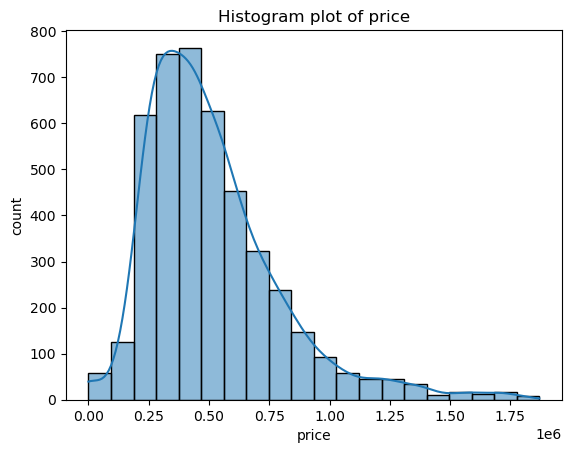

In [78]:
sns.histplot(HS_FL["price"],bins=20,kde=True)
plt.title("Histogram plot of price")
plt.xlabel("price")
plt.ylabel("count")
plt.show()

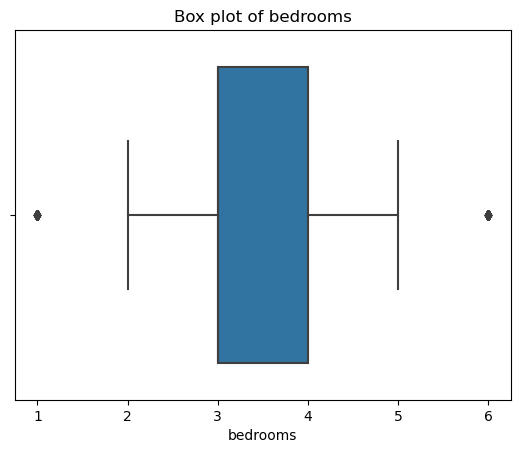

In [79]:
sns.boxplot(x="bedrooms",data=HS_FL)
plt.title("Box plot of bedrooms")
plt.xlabel("bedrooms")
plt.show()

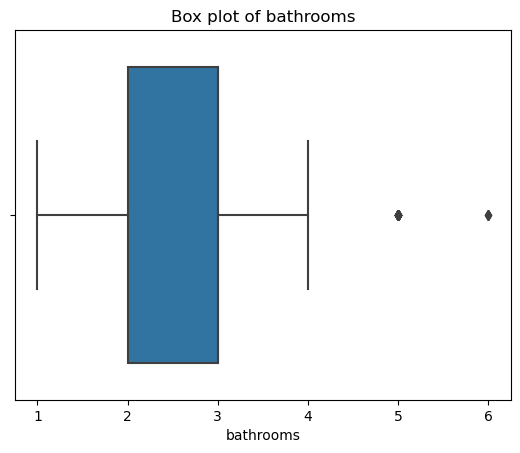

In [80]:
sns.boxplot(x="bathrooms",data=HS_FL)
plt.title("Box plot of bathrooms")
plt.xlabel("bathrooms")
plt.show()

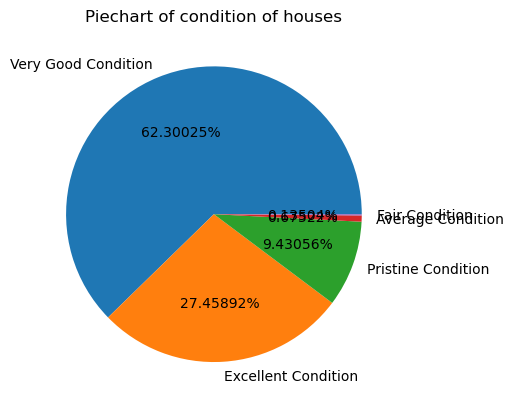

In [81]:
HS_condition = HS_FL["condition"].value_counts()
plt.pie(HS_condition, labels=HS_condition.index, autopct="%2.5f%%")
plt.title("Piechart of condition of houses")
plt.show()

# Bivariate Analysis

In [82]:
HS_FL

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,category_of_house,type_of_house,age_of_house
0,313000.0000,3,2,1340.0,14856.81,2,Not Available,Fair View,Very Good Condition,1340,0,1955.0,Shoreline,Compact House,3BHK,69
2,342000.0000,3,2,1930.0,14856.81,1,Not Available,Fair View,Excellent Condition,1930,0,1966.0,Kent,Compact House,3BHK,58
3,420000.0000,3,3,2000.0,14856.81,1,Not Available,Fair View,Excellent Condition,1000,1000,1963.0,Bellevue,Compact House,3BHK,61
4,550000.0000,4,3,1940.0,14856.81,1,Not Available,Fair View,Excellent Condition,1140,800,1976.0,Redmond,Compact House,4BHK,48
5,490000.0000,2,1,880.0,14856.81,1,Not Available,Fair View,Very Good Condition,880,0,1938.0,Seattle,Tiny House,2BHK,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.6667,3,2,1510.0,6360.00,1,Not Available,Fair View,Excellent Condition,1510,0,1970.0,Seattle,Compact House,3BHK,54
4596,534333.3333,3,3,1460.0,7573.00,2,Not Available,Fair View,Very Good Condition,1460,0,1970.0,Bellevue,Compact House,3BHK,54
4597,416904.1667,3,3,3010.0,7014.00,2,Not Available,Fair View,Very Good Condition,3010,0,1970.0,Renton,Bungalow House,3BHK,54
4598,203400.0000,4,2,2090.0,6630.00,1,Not Available,Fair View,Very Good Condition,1070,1020,1970.0,Seattle,Villa House,4BHK,54


## Chi square test

In [83]:
HS_FL["condition"].unique()

array(['Very Good Condition', 'Excellent Condition', 'Pristine Condition',
       'Average Condition', 'Fair Condition'], dtype=object)

In [84]:
# creating a dictonary for mapping

condtion_mapping = {"Fair Condition":1,"Average Condition":2,"Very Good Condition":3,"Excellent Condition":4,"Pristine Condition":5}

# using map function to encode

HS_FL["cnd"]=HS_FL["condition"].map(condtion_mapping)

In [85]:
HS_FL["city"].unique()

array(['Shoreline', 'Kent', 'Bellevue', 'Redmond', 'Seattle',
       'Maple Valley', 'Snoqualmie', 'Renton', 'Auburn', 'Sammamish',
       'Kirkland', 'Issaquah', 'Des Moines', 'Federal Way', 'Duvall',
       'Burien', 'Covington', 'Inglewood-Finn Hill', 'Kenmore',
       'Carnation', 'North Bend', 'Newcastle', 'Woodinville',
       'Mercer Island', 'Bothell', 'Clyde Hill', 'Algona', 'Skykomish',
       'Normandy Park', 'Tukwila', 'Vashon', 'Lake Forest Park',
       'Fall City', 'Black Diamond', 'Ravensdale', 'SeaTac', 'Enumclaw',
       'Medina', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton', 'Yarrow Point'], dtype=object)

In [86]:
# creating a dictonary for mapping

condtion_mapping_1 = {"Shoreline":3,"Kent":4,"Bellevue":5,"Redmond":2,"Seattle":1,"Maple Valley":6,"Snoqualmie":7,"Renton":8,"Auburn":9,"Sammamish":10,
                   "Kirkland":11,"Issaquah":12,"Des Moines":13,"Federal Way":14,"Duvall":15,"Burien":16,"Covington":17,"Inglewood-Finn Hill":18,
                   "Kenmore":19,"Carnation":20,"North Bend":21,"Newcastle":22,"Woodinville":23,"Mercer Island":24,"Bothell":25,"Clyde Hill":26,
                    "Algona":27,"Skykomish":28,"Normandy Park":29,"Tukwila":30,"Vashon":31,"Lake Forest Park":32,"Fall City":33,"Black Diamond":34,
                   "Ravensdale":35,"SeaTac":36,"Enumclaw":37,"Medina":38,"Snoqualmie Pass":39,"Pacific":40,"Beaux Arts Village":41,"Preston":42,
                   "Milton":43,"Yarrow Point":44}

# using map function to encode

HS_FL["cty"]=HS_FL["city"].map(condtion_mapping_1)

In [87]:
# Assigining variables to perform chi-square test

Va_A=HS_FL[["floors","cnd"]]
Va_B=HS_FL["cty"]

In [88]:
# Performing Chi-square test

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=1) 
fit=best_features.fit(Va_A,Va_B)
selected_features=Va_A.columns[fit.get_support()]

In [89]:
selected_features

Index(['floors'], dtype='object')

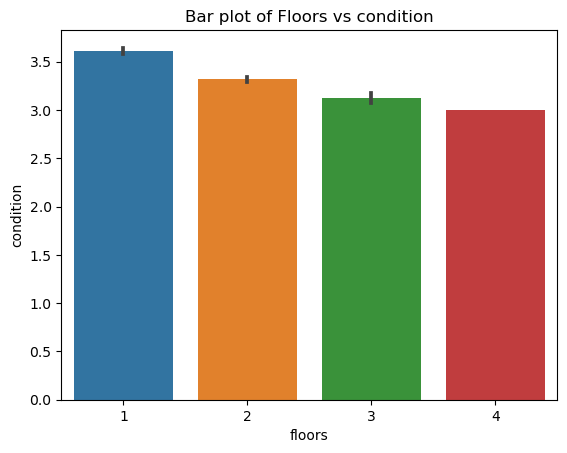

In [90]:
sns.barplot(x="floors",y="cnd",data=HS_FL)
plt.title("Bar plot of Floors vs condition")
plt.xlabel("floors")
plt.ylabel("condition")
plt.show()

# Anova test

In [91]:
VA_C=HS_FL[["price","yr_built",]]
VA_D=HS_FL["condition"]

In [92]:
# Apply Anova (x^2) statistical test for feature selection using anova function

best_features=SelectKBest(score_func=f_classif,k=1) 
fit=best_features.fit(VA_C,VA_D)
selected_features=VA_C.columns[fit.get_support()]

In [93]:
selected_features

Index(['yr_built'], dtype='object')

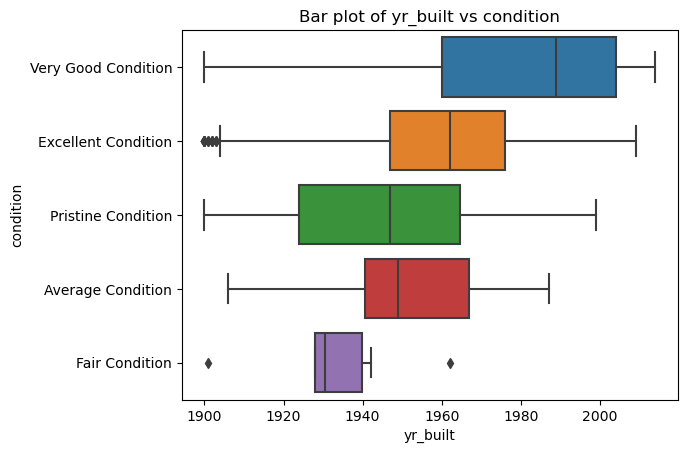

In [94]:
sns.boxplot(x="yr_built",y="condition",data=HS_FL)
plt.title("Bar plot of yr_built vs condition")
plt.xlabel("yr_built")
plt.ylabel("condition")
plt.show()

# Multivariate Analysis

In [95]:
# Selecting the features that determines the condition of the house

VA_E=HS_FL[["price","bedrooms","bathrooms","sqft_living","floors"]]
VA_F=HS_FL["condition"]

In [96]:
# Apply Anova (x^2) statistical test for feature selection using anova function

best_features=SelectKBest(score_func=f_classif,k=2) 
fit=best_features.fit(VA_E,VA_F)
selected_features=VA_E.columns[fit.get_support()]

In [97]:
selected_features

Index(['bathrooms', 'floors'], dtype='object')

In [98]:
# Selecting the features that determines the view of the house

VA_G=HS_FL[["price","bedrooms","bathrooms","sqft_living","floors"]]
VA_H=HS_FL["view"]

In [99]:
# Apply Anova (x^2) statistical test for feature selection using anova function

best_features=SelectKBest(score_func=f_classif,k=1) 
fit=best_features.fit(VA_G,VA_H)
selected_features=VA_G.columns[fit.get_support()]

In [100]:
selected_features

Index(['price'], dtype='object')

In [101]:
# Selecting the features that determines that the house has waterfront or not

VA_I=HS_FL[["price","bedrooms","bathrooms","sqft_living","floors"]]
VA_J=HS_FL["waterfront"]

In [102]:
# Apply Anova (x^2) statistical test for feature selection using anova function

best_features=SelectKBest(score_func=f_classif,k=1) 
fit=best_features.fit(VA_I,VA_J)
selected_features=VA_I.columns[fit.get_support()]

In [103]:
selected_features

Index(['price'], dtype='object')

In [104]:
HS_pairplot=HS_FL[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","age_of_house"]]

<Figure size 1000x800 with 0 Axes>

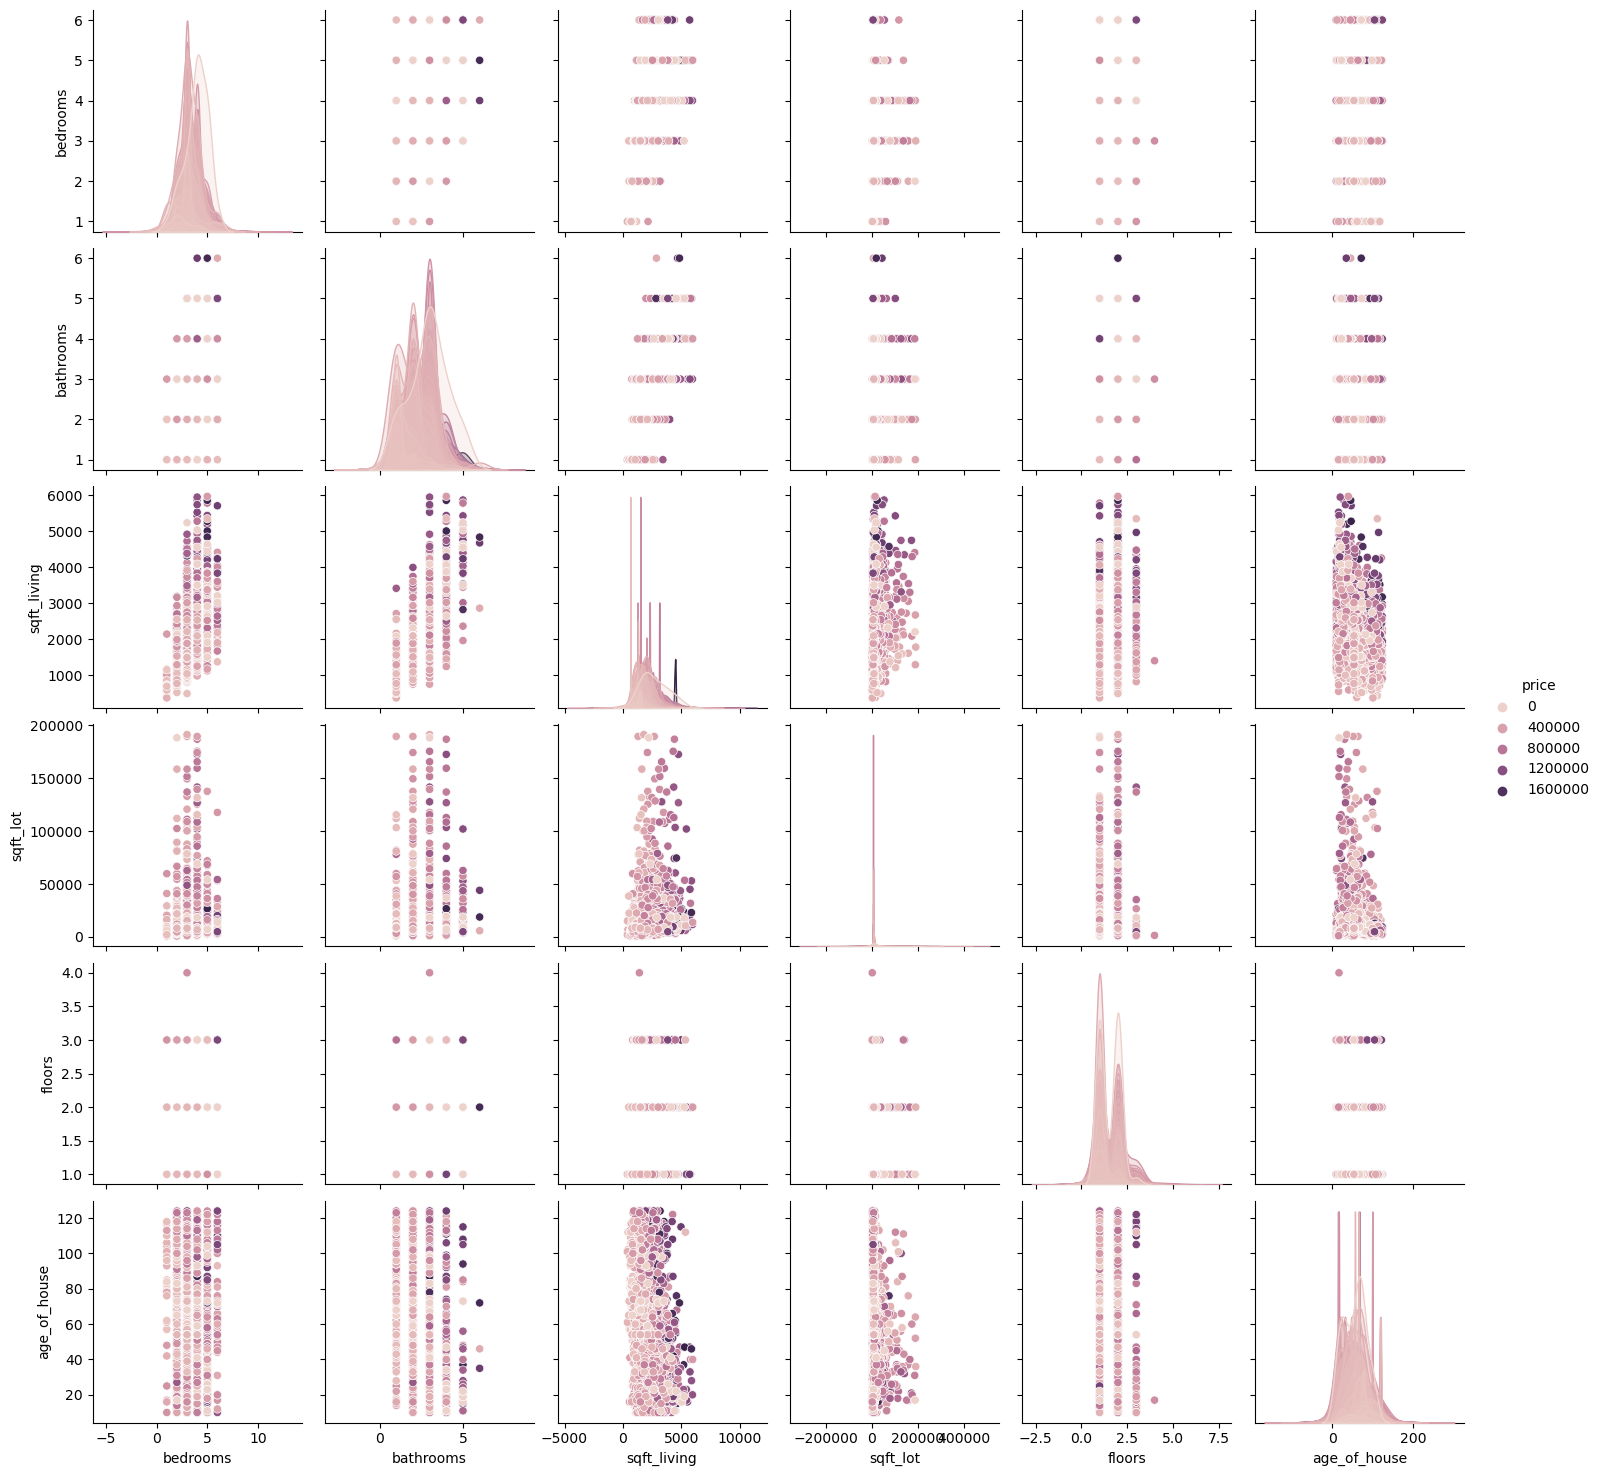

In [105]:
plt.figure(figsize=(10,8))
sns.pairplot(data=HS_pairplot,hue="price")
plt.show()